In [2]:
import re
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
snapshot = open(".gas-snapshot", 'r').readlines()

In [4]:
snapshot


['AzukiTest:testMintMany() (gas: 50742021)\n',
 'AzukiTest:testSafeMintToERC721Recipient() (gas: 361250)\n',
 'AzukiTest:testTransferFrom() (gas: 505992)\n',
 'BlimpieTest:testMintMany() (gas: 286403908)\n',
 'BlimpieTest:testSafeMintToERC721Recipient() (gas: 338210)\n',
 'BlimpieTest:testTransferFrom() (gas: 459380)\n',
 'ERC721KTest:testMintMany() (gas: 46314247)\n',
 'ERC721KTest:testSafeMintToERC721Recipient() (gas: 363148)\n',
 'ERC721KTest:testTransferFrom() (gas: 487439)\n',
 'ElevenFiftyFiveDTest:testMintMany() (gas: 296936107)\n',
 'ElevenFiftyFiveDTest:testSafeMintToERC721Recipient() (gas: 531217)\n',
 'ElevenFiftyFiveDTest:testTransferFrom() (gas: 551653)\n',
 'GeneticChainTest:testMintMany() (gas: 281102498)\n',
 'GeneticChainTest:testSafeMintToERC721Recipient() (gas: 338486)\n',
 'GeneticChainTest:testTransferFrom() (gas: 462112)\n',
 'ManifoldTest:testMintMany() (gas: 521578683)\n',
 'ManifoldTest:testSafeMintToERC721Recipient() (gas: 409407)\n',
 'ManifoldTest:testTransf

In [5]:
def process_line(line):
    regex= r"^(.*)?:(.+\(\)) \(gas: (\d+)\)$"
    regex_run = re.search(regex,line)
    groups = regex_run.groups()
    return {groups[0]:[{groups[1]: int(groups[2])}]}

snapshot_processed = list(map(process_line,snapshot))

In [6]:
snapshot_processed

[{'AzukiTest': [{'testMintMany()': 50742021}]},
 {'AzukiTest': [{'testSafeMintToERC721Recipient()': 361250}]},
 {'AzukiTest': [{'testTransferFrom()': 505992}]},
 {'BlimpieTest': [{'testMintMany()': 286403908}]},
 {'BlimpieTest': [{'testSafeMintToERC721Recipient()': 338210}]},
 {'BlimpieTest': [{'testTransferFrom()': 459380}]},
 {'ERC721KTest': [{'testMintMany()': 46314247}]},
 {'ERC721KTest': [{'testSafeMintToERC721Recipient()': 363148}]},
 {'ERC721KTest': [{'testTransferFrom()': 487439}]},
 {'ElevenFiftyFiveDTest': [{'testMintMany()': 296936107}]},
 {'ElevenFiftyFiveDTest': [{'testSafeMintToERC721Recipient()': 531217}]},
 {'ElevenFiftyFiveDTest': [{'testTransferFrom()': 551653}]},
 {'GeneticChainTest': [{'testMintMany()': 281102498}]},
 {'GeneticChainTest': [{'testSafeMintToERC721Recipient()': 338486}]},
 {'GeneticChainTest': [{'testTransferFrom()': 462112}]},
 {'ManifoldTest': [{'testMintMany()': 521578683}]},
 {'ManifoldTest': [{'testSafeMintToERC721Recipient()': 409407}]},
 {'Manif

In [7]:
def merge_dictionaries(list_dic):
    res = {}
    for items in list_dic:
        for key,value in items.items():
          res.setdefault(key, {}).update(value[0])
    return res
        
  
snapshot_by_imp = merge_dictionaries(snapshot_processed)

In [8]:
snapshot_by_imp

{'AzukiTest': {'testMintMany()': 50742021,
  'testSafeMintToERC721Recipient()': 361250,
  'testTransferFrom()': 505992},
 'BlimpieTest': {'testMintMany()': 286403908,
  'testSafeMintToERC721Recipient()': 338210,
  'testTransferFrom()': 459380},
 'ERC721KTest': {'testMintMany()': 46314247,
  'testSafeMintToERC721Recipient()': 363148,
  'testTransferFrom()': 487439},
 'ElevenFiftyFiveDTest': {'testMintMany()': 296936107,
  'testSafeMintToERC721Recipient()': 531217,
  'testTransferFrom()': 551653},
 'GeneticChainTest': {'testMintMany()': 281102498,
  'testSafeMintToERC721Recipient()': 338486,
  'testTransferFrom()': 462112},
 'ManifoldTest': {'testMintMany()': 521578683,
  'testSafeMintToERC721Recipient()': 409407,
  'testTransferFrom()': 514427},
 'MasonChanceTest': {'testMintMany()': 277997374,
  'testSafeMintToERC721Recipient()': 337139,
  'testTransferFrom()': 457545},
 'OZTest': {'testMintMany()': 284013814,
  'testSafeMintToERC721Recipient()': 337855,
  'testTransferFrom()': 462164}

In [9]:


dataframe = pd.DataFrame(snapshot_by_imp)
 
dataframe2 = pd.DataFrame.from_dict(snapshot_by_imp, orient='index')
dataframe2

,testMintMany(),testSafeMintToERC721Recipient(),testTransferFrom()
AzukiTest,50742021,361250,505992
BlimpieTest,286403908,338210,459380
ERC721KTest,46314247,363148,487439
ElevenFiftyFiveDTest,296936107,531217,551653
GeneticChainTest,281102498,338486,462112
ManifoldTest,521578683,409407,514427
MasonChanceTest,277997374,337139,457545
OZTest,284013814,337855,462164
SolmateTest,277997374,337139,457545
TinyTest,351492825,367049,494610


<AxesSubplot:>

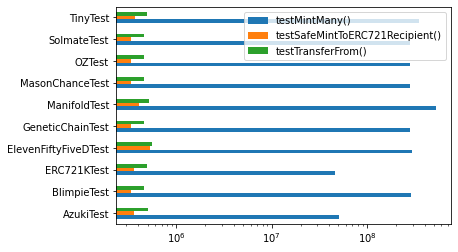

In [10]:
dataframe2.plot.barh(logx=True)

<AxesSubplot:>

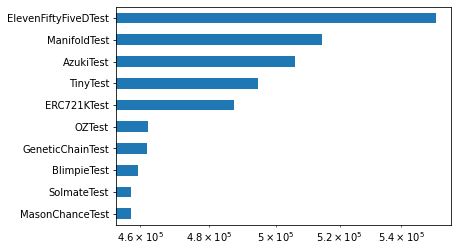

In [11]:
dataframe2['testTransferFrom()'].sort_values().plot.barh(logx=True)

<AxesSubplot:>

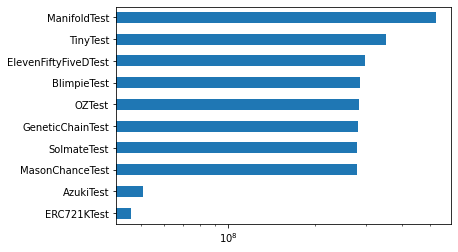

In [12]:
dataframe2['testMintMany()'].sort_values().plot.barh(logx=True)

<AxesSubplot:>

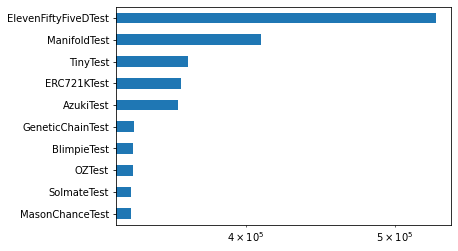

In [13]:
dataframe2['testSafeMintToERC721Recipient()'].sort_values().plot.barh(logx=True)

In [16]:
gasPrice = 30

ethereumPrice = 2800


dataframe2['price_testSafeMintToERC721Recipient()']= dataframe2.apply(lambda row: row['testSafeMintToERC721Recipient()'] * gasPrice * 10**-9 * ethereumPrice  , axis=1)
dataframe2['price_testMintMany()']= dataframe2.apply(lambda row: row['testMintMany()'] * gasPrice * 10**-9 * ethereumPrice  , axis=1)
dataframe2['price_testTransferFrom()']= dataframe2.apply(lambda row: row['testTransferFrom()'] * gasPrice * 10**-9 * ethereumPrice  , axis=1)

In [18]:
dataframe2

,testMintMany(),testSafeMintToERC721Recipient(),testTransferFrom(),price_testSafeMintToERC721Recipient(),price_testMintMany(),price_testTransferFrom()
AzukiTest,50742021,361250,505992,30.345000,4262.329764,42.503328
BlimpieTest,286403908,338210,459380,28.409640,24057.928272,38.587920
ERC721KTest,46314247,363148,487439,30.504432,3890.396748,40.944876
ElevenFiftyFiveDTest,296936107,531217,551653,44.622228,24942.632988,46.338852
GeneticChainTest,281102498,338486,462112,28.432824,23612.609832,38.817408
ManifoldTest,521578683,409407,514427,34.390188,43812.609372,43.211868
MasonChanceTest,277997374,337139,457545,28.319676,23351.779416,38.433780
OZTest,284013814,337855,462164,28.379820,23857.160376,38.821776
SolmateTest,277997374,337139,457545,28.319676,23351.779416,38.433780
TinyTest,351492825,367049,494610,30.832116,29525.397300,41.547240


In [27]:
dataframe2.filter(regex=("price_*"))

,price_testSafeMintToERC721Recipient(),price_testMintMany(),price_testTransferFrom()
AzukiTest,30.345000,4262.329764,42.503328
BlimpieTest,28.409640,24057.928272,38.587920
ERC721KTest,30.504432,3890.396748,40.944876
ElevenFiftyFiveDTest,44.622228,24942.632988,46.338852
GeneticChainTest,28.432824,23612.609832,38.817408
ManifoldTest,34.390188,43812.609372,43.211868
MasonChanceTest,28.319676,23351.779416,38.433780
OZTest,28.379820,23857.160376,38.821776
SolmateTest,28.319676,23351.779416,38.433780
TinyTest,30.832116,29525.397300,41.547240
